In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from sklearn.metrics import classification_report

pd.set_option('display.max_rows', None)


In [100]:
vit_results = pd.read_csv("../imagenet_results.csv").drop("Unnamed: 0",axis=1)

In [117]:
sph_vit_results = pd.read_csv("../ti_sph_imagenet_results.csv").drop("Unnamed: 0",axis=1)

In [104]:
subset = pd.read_csv('../../sphere_projection/sph_imagenet_5k.csv').drop("Unnamed: 0",axis=1)

In [81]:
original_test = pd.read_csv("~/projects/pytorch-image-models/vit_imagenet_test.csv").drop("Unnamed: 0",axis=1)

In [118]:
vit_results["correct"] = np.where(original_test["class"] == vit_results["pred_class"], 1, 0) 
sph_vit_results["correct"] = np.where(original_test["class"] == sph_vit_results["pred_class"], 1, 0) 

In [115]:
vit_results["correct"].sum()

1149

In [119]:
sph_vit_results["correct"].sum()

44

In [120]:
len(sph_vit_results)

5000

In [116]:
subset

,file,class,x_rot,y_rot
0,espresso/495008000_abb158a7cd__-0.52409__-0.55...,espresso,-0.524090,-0.553140
1,espresso/495008000_abb158a7cd__0.7794__-0.6198...,espresso,0.779400,-0.619840
2,tennis ball/233948055_be12864336__2.6771__-1.2...,tennis ball,2.677100,-1.214300
3,tabby/160525104_20c99fad35__-0.88146__0.33093_...,tabby,-0.881460,0.330930
4,electric ray/3766373268_baf0fd41c7__-0.76236__...,electric ray,-0.762360,-0.149610
5,Tibetan terrier/92879631_5d0f31e780__-0.55692_...,Tibetan terrier,-0.556920,-0.261370
6,trombone/745523289_040426a19c__-1.4586__-0.702...,trombone,-1.458600,-0.702790
7,pretzel/362965951_3446698e19__-0.41606__1.4201...,pretzel,-0.416060,1.420100
8,cliff dwelling/250833563_4ea048b97b__-3.0789__...,cliff dwelling,-3.078900,0.988350
9,jack-o'-lantern/53533415_5a735945e4__1.1491__-...,jack-o'-lantern,1.149100,-0.154660


In [11]:
print(classification_report(vit_results['target'], vit_results['pred_class']))

                             precision    recall  f1-score   support

               Afghan hound       0.00      0.00      0.00         0
          African chameleon       0.00      0.00      0.00         0
          African crocodile       0.00      0.00      0.00         0
           African elephant       0.00      0.00      0.00         0
               African grey       0.00      0.00      0.00         0
        African hunting dog       0.00      0.00      0.00         0
                   Airedale       0.00      0.00      0.00         0
         American alligator       0.00      0.00      0.00         0
        American black bear       0.00      0.00      0.00         0
              American coot       0.00      0.00      0.00         0
           American lobster       0.00      0.00      0.00         0
                     Angora       0.00      0.00      0.00         0
                Appenzeller       0.00      0.00      0.00         0
                 Arctic fox      

In [24]:
vit_results[vit_results['class'] == 'Band Aid']

,file,class,x_rot,y_rot,pred_class,correct
156,Band Aid/3453639708_0bdf562ecb__-2.0295__-0.51...,Band Aid,-2.029500,-0.514080,lampshade,0
190,Band Aid/1862065690_419d4a584d__-2.7026__-0.23...,Band Aid,-2.702600,-0.237840,microphone,0
236,Band Aid/1578824142_46847a2b9c__-2.5903__1.114...,Band Aid,-2.590300,1.114100,fire screen,0
325,Band Aid/2882844681_84b1fd8db9__-2.3975__-0.33...,Band Aid,-2.397500,-0.330380,drum,0
359,Band Aid/2536804102_0a85016af3__-1.2756__-0.38...,Band Aid,-1.275600,-0.387670,Band Aid,1
504,Band Aid/3826934_224c254338__0.019482__-0.8960...,Band Aid,0.019482,-0.896090,Band Aid,1
508,Band Aid/3714550498_7c8a3cff5a__-0.30458__0.28...,Band Aid,-0.304580,0.285470,Band Aid,1
569,Band Aid/151708108_61baa16e2f__0.25897__-0.445...,Band Aid,0.258970,-0.445840,Band Aid,1
601,Band Aid/91389651_b106ce0666__0.38829__0.87927...,Band Aid,0.388290,0.879270,Band Aid,1
673,Band Aid/1641412501_94e7663dd4__0.32747__-1.30...,Band Aid,0.327470,-1.308800,plastic bag,0


In [182]:
acc_map = np.zeros((18,36))
frq_map = np.zeros((18,36))

for idx, row in rot_results.iterrows():
    x_idx = int((row['rand_x'] + 180) / 10)
    y_idx = int((row['rand_y'] + 90) / 10)

    acc_map[y_idx][x_idx] += row['abs_rel']
    frq_map[y_idx][x_idx] += 1
    
rot_err_map = acc_map/frq_map

In [183]:
acc_map = np.zeros((18,36))
frq_map = np.zeros((18,36))

for idx, row in upright_results.iterrows():
    x_idx = int((row['rand_x'] + 180) / 10)
    y_idx = int((row['rand_y'] + 90) / 10)
    
    acc_map[y_idx][x_idx] += row['abs_rel']
    frq_map[y_idx][x_idx] += 1

upright_err_map = acc_map/frq_map

In [184]:
max_error = max(upright_err_map.max(), rot_err_map.max())
min_error = min(upright_err_map.min(), rot_err_map.min())

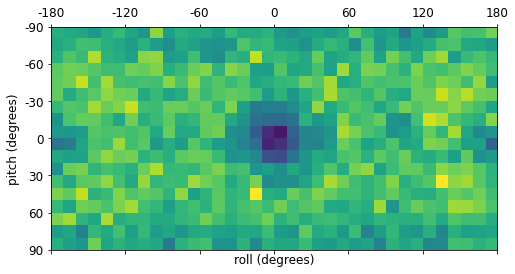

In [187]:
plt.matshow(rot_err_map)
plt.clim(min_error, max_error)
#plt.colorbar(fraction=0.08, pad=0.1)
plt.yticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=7, axis='y')
plt.xticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12)
plt.locator_params(nbins=7, axis='x')
plt.xlabel('roll (degrees)', fontsize=12)
plt.ylabel('pitch (degrees)', fontsize=12)
plt.show()


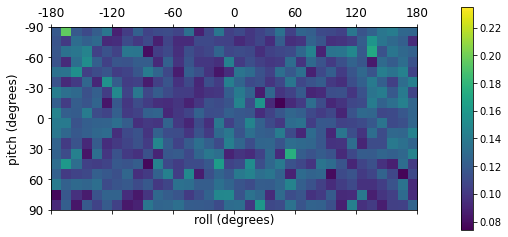

In [199]:
plt.matshow(upright_err_map)
plt.clim(min_error, max_error)
plt.colorbar(fraction=0.08, pad=0.1)
plt.yticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=7, axis='y')
plt.xticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12, )
plt.locator_params(nbins=7, axis='x')
plt.xlabel('roll (degrees)', fontsize=12)
plt.ylabel('pitch (degrees)', fontsize=12)
plt.show()


In [23]:
upright_results.loc[(upright_results['rand_x'] < -160) & (upright_results['rand_x'] > -170) & (upright_results['rand_y'] < -80)]

,input,rand_x,rand_y,abs_rel,sq_rel,rms_sq_lin,rms_sq_log,d1,d2,d3
75,DR75DR,-164.069658,-85.999212,0.148049,0.051628,0.101959,0.029841,0.811813,0.990527,0.999487
94,DR94DR,-169.493472,-84.963994,0.053788,0.012385,0.035139,0.005685,0.986204,0.998308,0.999877
2012,DR2012DR,-165.175352,-82.761249,0.046594,0.009767,0.026723,0.004674,0.988837,0.999313,0.999954
3611,DR3611DR,-166.132660,-83.768641,0.267263,0.192420,0.386197,0.082233,0.543061,0.909352,0.974202
4850,DR4850DR,-165.926317,-81.312647,0.228740,0.086473,0.111252,0.065909,0.616612,0.928176,0.987472
5782,DR5782DR,-163.105812,-80.660022,0.127419,0.077733,0.284867,0.019859,0.894057,0.996115,0.999992
5983,DR5983DR,-169.332127,-87.566689,0.499460,1.311160,2.317600,0.258682,0.491434,0.757646,0.826012
6026,DR6026DR,-168.267748,-83.734699,0.141760,0.078610,0.274257,0.046126,0.802517,0.970718,0.984631
6418,DR6418DR,-163.665839,-89.165328,0.109472,0.039989,0.109755,0.017935,0.923914,0.994641,0.998856
6703,DR6703DR,-169.884729,-81.541599,0.276439,0.142103,0.191727,0.085926,0.521496,0.891761,0.978073


In [27]:
frq_map.mean() 

10000.0

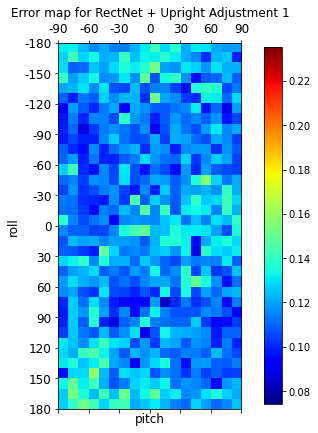

In [13]:
acc_map = np.zeros((36,18))
frq_map = np.zeros((36,18))

for idx, row in old_upright_results.iterrows():
    x_idx = int((row['rand_x'] + 180) / 10)
    y_idx = int((row['rand_y'] + 90) / 10)
    
    acc_map[x_idx][y_idx] += row['abs_rel']
    frq_map[x_idx][y_idx] += 1

old_upright_err_map = acc_map/frq_map

plt.matshow(old_upright_err_map, cmap='jet')
plt.clim(min_error, max_error)
plt.colorbar(fraction=0.08, pad=0.1)
plt.xticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=9, axis='x')
plt.yticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12)
plt.locator_params(nbins=18, axis='y')
plt.title('Error map for RectNet + Upright Adjustment 1')
plt.xlabel('pitch', fontsize=12)
plt.ylabel('roll', fontsize=12)
plt.show()


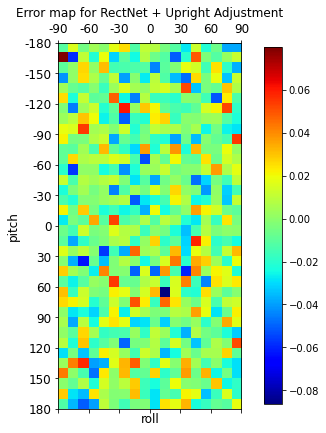

In [35]:
plt.matshow(upright_err_map-old_upright_err_map, cmap='jet')
plt.colorbar(fraction=0.08, pad=0.1)
plt.xticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=9, axis='x')
plt.yticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12)
plt.locator_params(nbins=18, axis='y')
plt.title('Error map for RectNet + Upright Adjustment')
plt.xlabel('pitch', fontsize=12)
plt.ylabel('roll', fontsize=12)
plt.show()


In [71]:
old_upright_results.loc[(old_upright_results['rand_x'].abs() < 5) & (old_upright_results['rand_y'].abs() < 5)]['abs_rel'].mean()

0.11388364631463499

In [72]:
upright_results.loc[(upright_results['rand_x'].abs() < 5) & (upright_results['rand_y'].abs() < 5)]['abs_rel'].mean()

0.10899525401847703

In [77]:
upright_results['abs_rel'].iloc[:1000].mean()

0.11367359292507172

In [78]:
old_upright_results['abs_rel'].iloc[:1000].mean()

0.12072196918725968

In [12]:
upright_err_map.max()

0.19561910371367747

In [27]:
rot_err_map.max()

0.2352487165480852

In [13]:
upright_results.loc[upright_results['abs_rel']>0.25]['rand_x'].abs().mean()

92.87679592923878

In [14]:
upright_results['rand_x'].abs().mean()

90.74067200565577

([<matplotlib.axis.XTick at 0x7f63454d6df0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

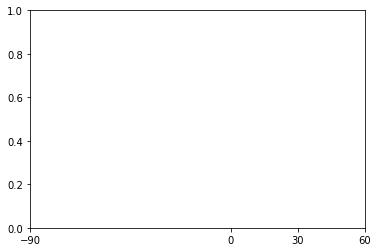

In [15]:
plt.xticks([-90,60,30,0,])